In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib.gridspec import GridSpec
from matplotlib.backends.backend_pdf import PdfPages
import math
from collections import Counter


import h5py
import scipy.io as sio
from scipy.stats import ttest_rel
from scipy.interpolate import interp1d
from skimage.segmentation import find_boundaries

from utils.functions import *
from utils.alignment import *
from utils.indication import *
from utils.plots import *
data_folder = ""


In [2]:

processing_files(bpod_file = f"./data/{data_folder}/bpod_session_data.mat", 
                     raw_voltage_file = f"./data/{data_folder}/raw_voltages.h5", 
                     dff_file = f"./data/{data_folder}/dff.h5", 
                     save_path = f"./data/{data_folder}/saved_trials_2.h5", 
                     exclude_start=20, exclude_end=20)


Correcting 2p camera trigger time
Aligning stimulus to 2p frame
Segmenting trials
Data for trial 0 has been added.
Data for trial 1 has been added.
Data for trial 2 has been added.
Data for trial 3 has been added.
Data for trial 4 has been added.
Data for trial 5 has been added.
Data for trial 6 has been added.
Data for trial 7 has been added.
Data for trial 8 has been added.
Data for trial 9 has been added.
Data for trial 10 has been added.
Data for trial 11 has been added.
Data for trial 12 has been added.
Data for trial 13 has been added.
Data for trial 14 has been added.
Data for trial 15 has been added.
Data for trial 16 has been added.
Data for trial 17 has been added.
Data for trial 18 has been added.
Data for trial 19 has been added.
Data for trial 20 has been added.
Data for trial 21 has been added.
Data for trial 22 has been added.
Data for trial 23 has been added.
Data for trial 24 has been added.
Data for trial 25 has been added.
Data for trial 26 has been added.
Data for t

In [15]:
trials = h5py.File(f"./data/{data_folder}/saved_trials_2.h5")["trial_id"]
init_time, init_index, ending_time, ending_index, event_index, ap_index = aligning_times(trials=trials)
shorts, longs = block_type(trials)
fec, fec_time_0 = fec_zero(trials)
fec_0 = moving_average(fec , window_size=7)
CR_stat, CR_interval_avg, base_line_avg  = CR_stat_indication(trials , static_threshold = 1.5, AP_delay = 3)
short_CRp_fec, short_CRn_fec, long_CRp_fec, long_CRn_fec = block_and_CR_fec(CR_stat,fec_0, shorts, longs)
all_id = sort_numbers_as_strings(shorts + longs)
event_diff, ap_diff , ending_diff = index_differences(init_index , event_index, ending_index, ap_index)

print(event_diff , ap_diff)

# print(fec_time_0["100"][1] - fec_time_0["100"][0])
# print(fec_time_0["101"][1] - fec_time_0["101"][0])
# print(fec_time_0["102"][1] - fec_time_0["102"][0])
# print(fec_time_0["102"][2] - fec_time_0["102"][1])
# print(fec_time_0["102"][4] - fec_time_0["102"][3])

# print(ap_index["85"] - event_index["85"])
# print(ap_index["101"] - event_index["101"])

29 41


In [18]:
short_crp_aligned_dff , short_crp_aligned_time = aligned_dff(trials,shorts,CR_stat, 1, init_index, ending_index, shorts[0])
short_crn_aligned_dff , short_crn_aligned_time = aligned_dff(trials,shorts,CR_stat, 0, init_index, ending_index, shorts[0])
long_crp_aligned_dff , long_crp_aligned_time = aligned_dff(trials,longs,CR_stat, 1, init_index, ending_index, longs[0])
long_crn_aligned_dff , long_crn_aligned_time = aligned_dff(trials,longs,CR_stat, 0, init_index, ending_index, longs[0])

short_crp_avg_pooled, short_crp_sem_pooled = calculate_average_dff_pool(short_crp_aligned_dff)
short_crn_avg_pooled, short_crn_sem_pooled = calculate_average_dff_pool(short_crn_aligned_dff)
long_crp_avg_pooled, long_crp_sem_pooled = calculate_average_dff_pool(long_crp_aligned_dff)
long_crn_avg_pooled, long_crn_sem_pooled = calculate_average_dff_pool(long_crn_aligned_dff)

short_crp_avg_dff, short_crp_sem_dff = calculate_average_dff_roi(aligned_dff=short_crp_aligned_dff)
short_crn_avg_dff, short_crn_sem_dff = calculate_average_dff_roi(aligned_dff=short_crn_aligned_dff)
long_crp_avg_dff, long_crp_sem_dff = calculate_average_dff_roi(aligned_dff=long_crp_aligned_dff)
long_crn_avg_dff, long_crn_sem_dff = calculate_average_dff_roi(aligned_dff=long_crn_aligned_dff)

short_crp_avg_roi, short_crp_sem_roi = average_over_roi(short_crp_avg_dff)
short_crn_avg_roi, short_crn_sem_roi = average_over_roi(short_crn_avg_dff)
long_crp_avg_roi, long_crp_sem_roi =   average_over_roi(long_crp_avg_dff)
long_crn_avg_roi, long_crn_sem_roi =   average_over_roi(long_crn_avg_dff)

0 42
0 42
0 42
0 42


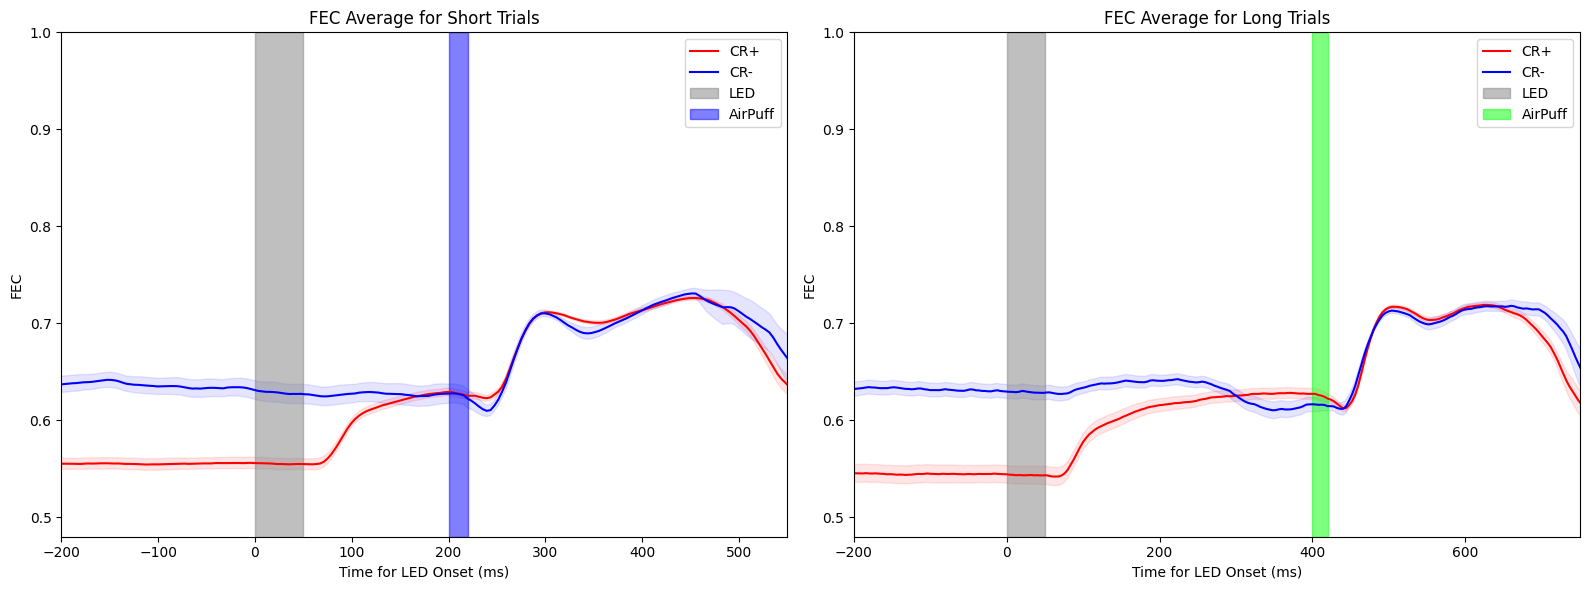

In [19]:
plot_fec_averages(short_CRp_fec, short_CRn_fec, long_CRp_fec, long_CRn_fec, fec_time_0, shorts, longs, trials, y_lim = 0.48 , sample_id=shorts[0])

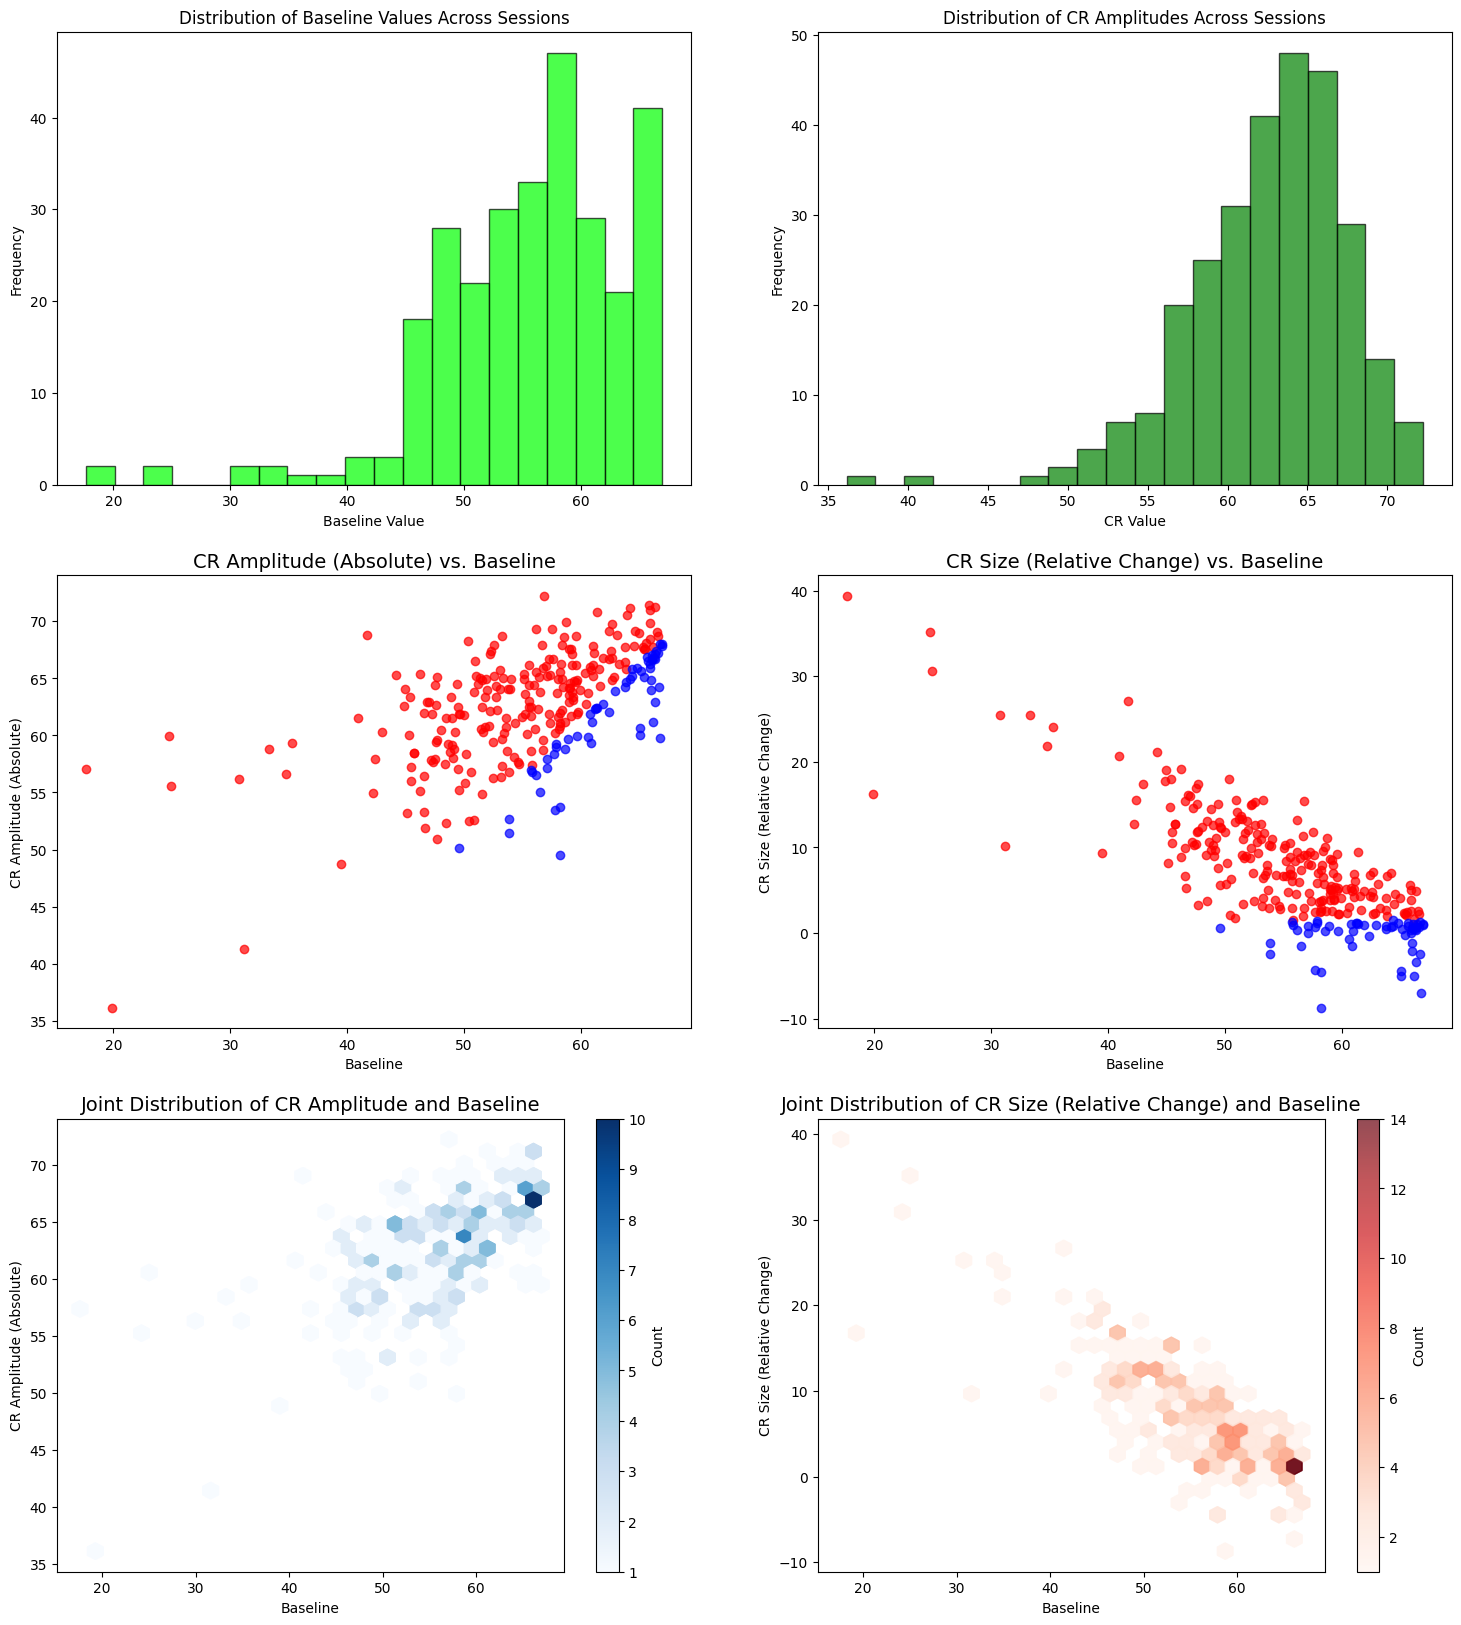

In [21]:
plot_fec_CR_scatter(base_line_avg, CR_interval_avg, CR_stat)

In [22]:
save_fec_plots_to_pdf(trials, fec_time_0, fec_0, CR_stat,all_id, f"./outputs/{data_folder}/trial_FEC.pdf")

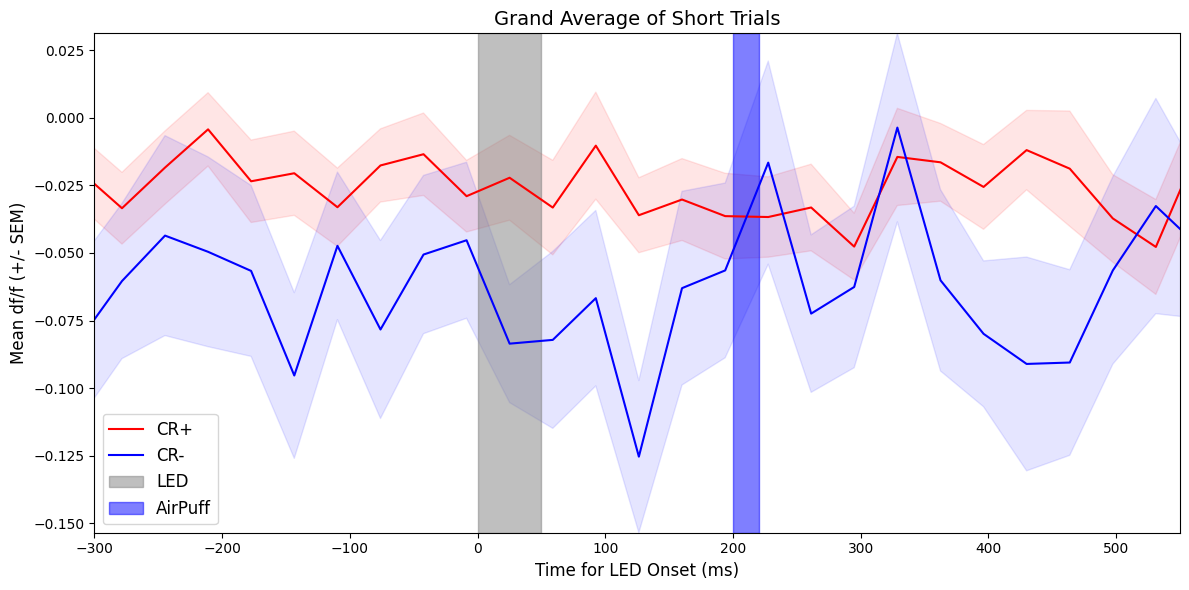

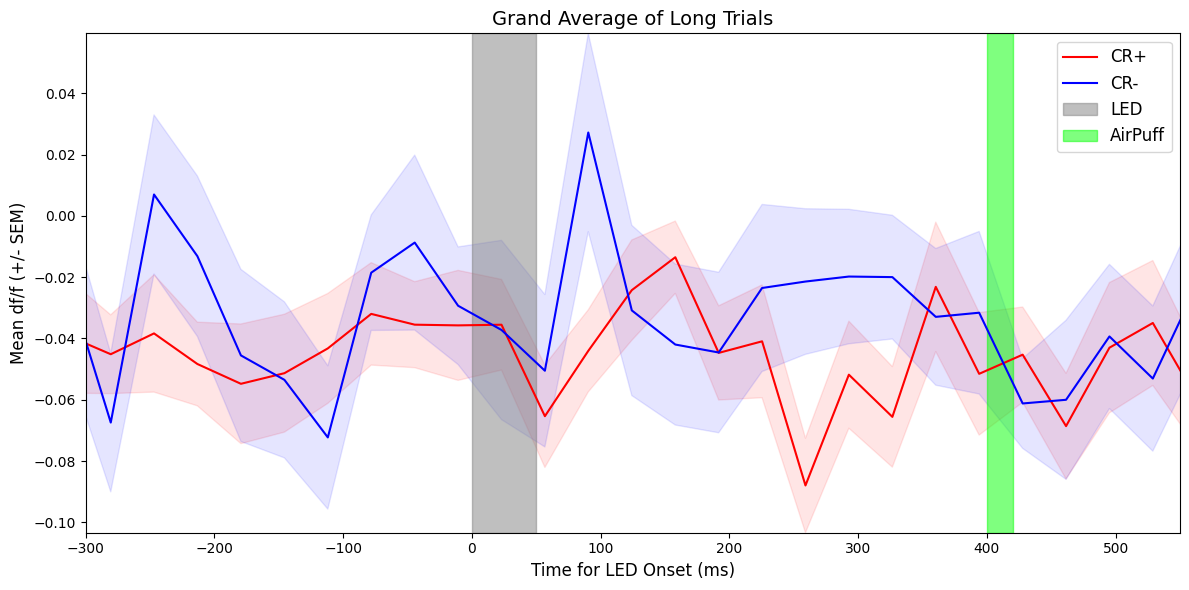

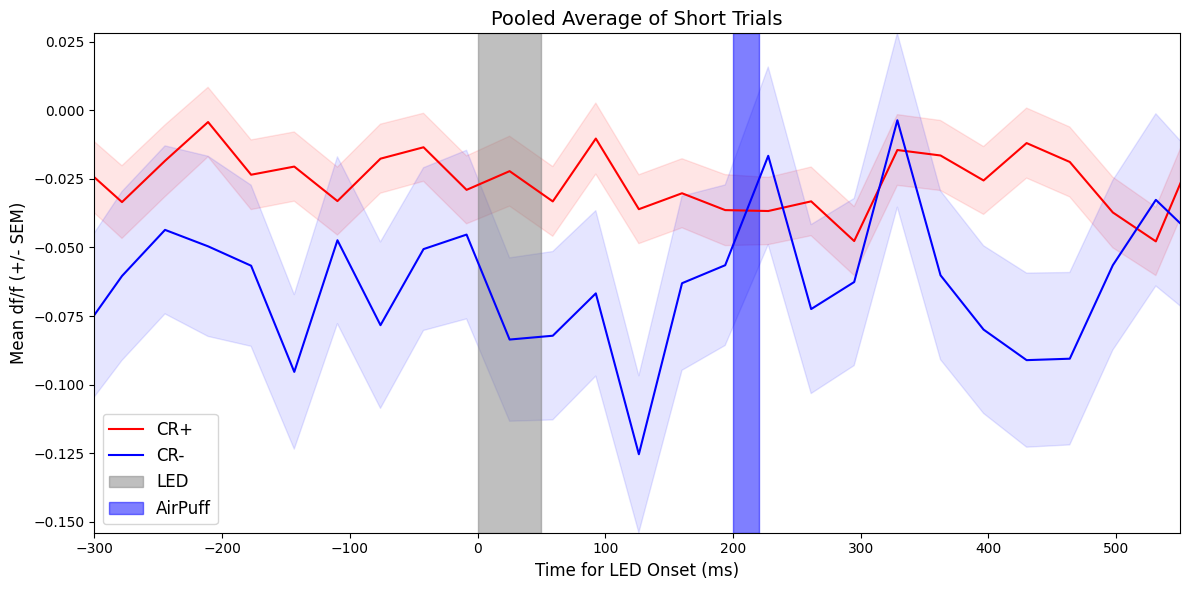

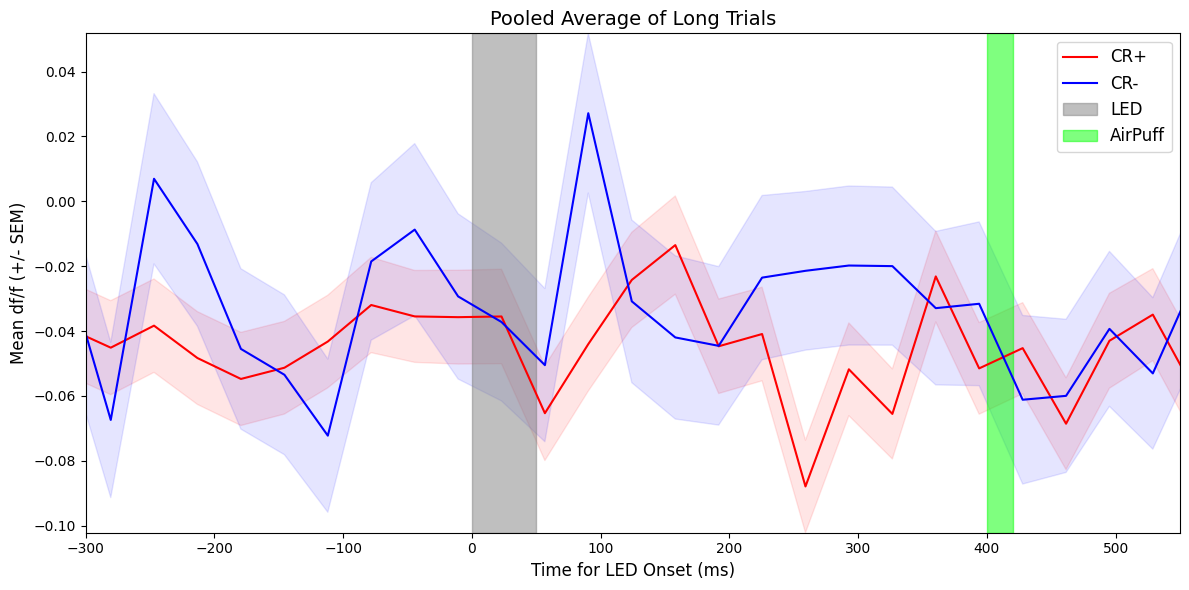

In [23]:
plot_trial_averages(trials, short_crp_aligned_time, short_crp_avg_roi, short_crp_sem_roi, 
                    short_crn_avg_roi, short_crn_sem_roi, title_suffix="Short")
plot_trial_averages(trials, long_crp_aligned_time, long_crp_avg_roi, long_crp_sem_roi, 
                    long_crn_avg_roi, long_crn_sem_roi, title_suffix="Long")

plot_trial_averages(trials, short_crp_aligned_time, short_crp_avg_pooled, short_crp_sem_pooled, 
                    short_crn_avg_pooled, short_crn_sem_pooled, title_suffix="Short", pooled=True)
plot_trial_averages(trials, long_crp_aligned_time, long_crp_avg_pooled, long_crp_sem_pooled, 
                    long_crn_avg_pooled, long_crn_sem_pooled, title_suffix="Long", pooled=True)

In [24]:
save_roi_plots_to_pdf(short_crp_avg_dff, short_crn_avg_dff, short_crp_sem_dff, short_crn_sem_dff, 
                          short_crp_aligned_time, long_crp_avg_dff, long_crn_avg_dff, long_crp_sem_dff, long_crn_sem_dff, 
                          long_crp_aligned_time, trials, pdf_filename = f"./outputs/{data_folder}/roi_plots_sclaed.pdf")

All plots have been saved to ./outputs/1108/roi_plots_sclaed.pdf


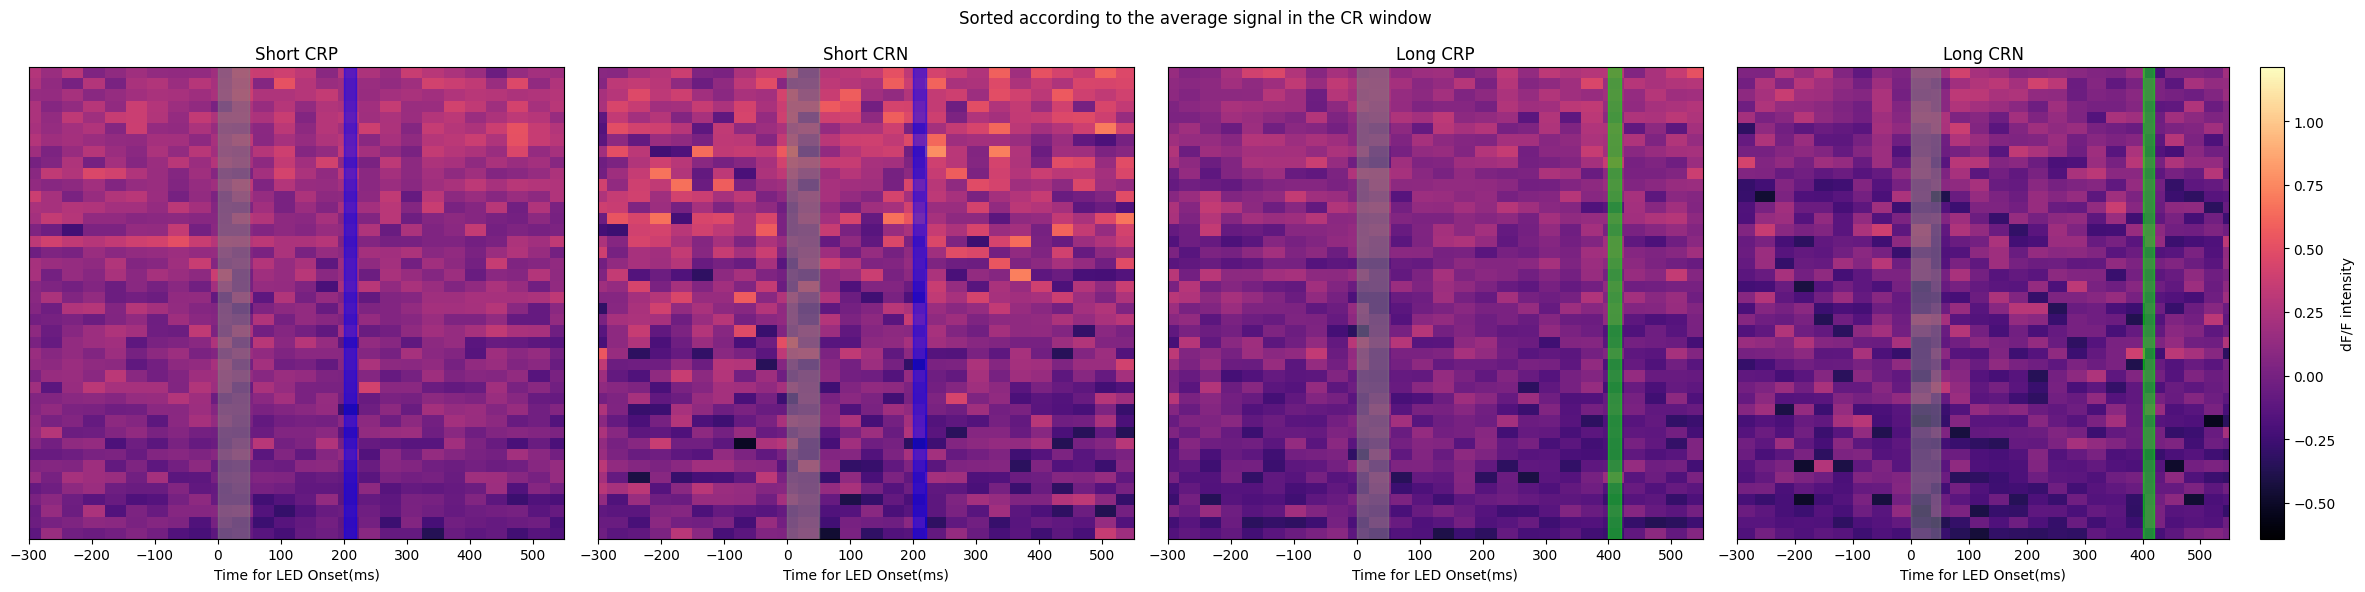

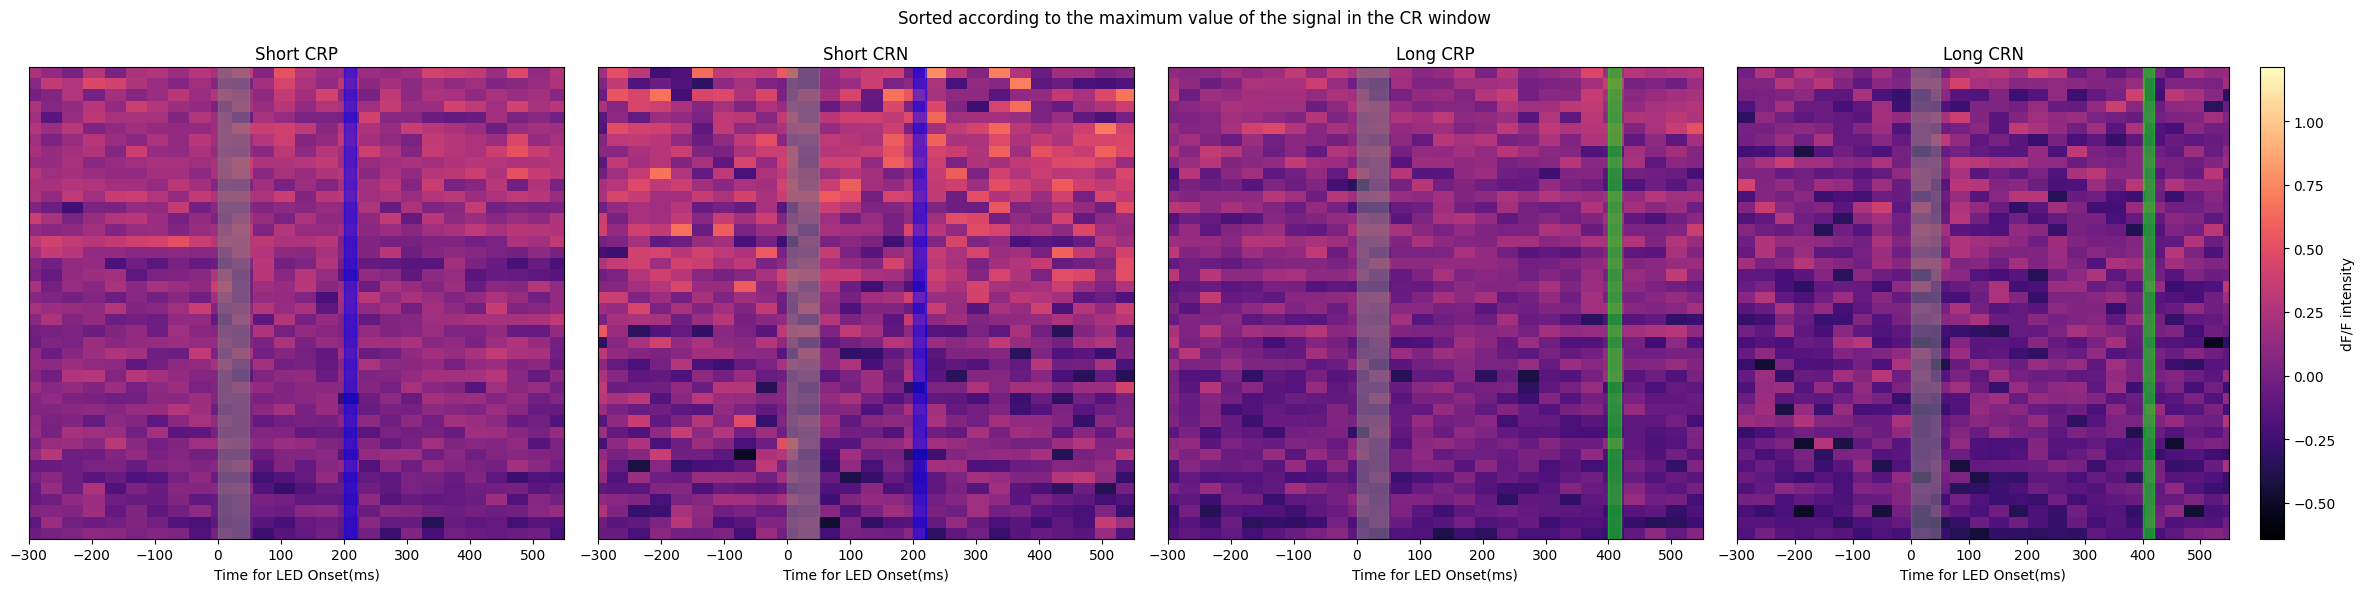

In [25]:
# Sort and create heatmaps for all datasets
sorted_avg_short_crp_roi = sort_dff_avg(short_crp_avg_dff, event_diff, ap_diff)
sorted_avg_short_crn_roi = sort_dff_avg(short_crn_avg_dff, event_diff, ap_diff)
sorted_avg_long_crp_roi = sort_dff_avg(long_crp_avg_dff, event_diff, ap_diff)
sorted_avg_long_crn_roi = sort_dff_avg(long_crn_avg_dff, event_diff, ap_diff)

# Create heat arrays
heat_arrays_avg = []
for sorted_avg_rois, dff in [
    (sorted_avg_short_crp_roi, short_crp_avg_dff),
    (sorted_avg_short_crn_roi, short_crn_avg_dff),
    (sorted_avg_long_crp_roi, long_crp_avg_dff),
    (sorted_avg_long_crn_roi, long_crn_avg_dff),
]:
    heat_array_0 = [dff[roi] for roi in list(sorted_avg_rois)]
    heat_arrays_avg.append(np.vstack(heat_array_0))


sorted_max_short_crp_roi = sort_dff_max(short_crp_avg_dff, event_diff, ap_diff)
sorted_max_short_crn_roi = sort_dff_max(short_crn_avg_dff, event_diff, ap_diff)
sorted_max_long_crp_roi =  sort_dff_max(long_crp_avg_dff, event_diff, ap_diff)
sorted_max_long_crn_roi =  sort_dff_max(long_crn_avg_dff, event_diff, ap_diff)

# Create heat arrays
heat_arrays_max = []
for sorted_max_rois, dff in [
    (sorted_max_short_crp_roi, short_crp_avg_dff),
    (sorted_max_short_crn_roi, short_crn_avg_dff),
    (sorted_max_long_crp_roi, long_crp_avg_dff),
    (sorted_max_long_crn_roi, long_crn_avg_dff),
]:
    heat_array_0 = [dff[roi] for roi in list(sorted_max_rois)]
    heat_arrays_max.append(np.vstack(heat_array_0))

aligned_times = [
    short_crp_aligned_time,
    short_crn_aligned_time,
    long_crp_aligned_time,
    long_crn_aligned_time
]

titles = ["Short CRP", "Short CRN", "Long CRP", "Long CRN"]

plot_heatmaps_side_by_side(heat_arrays_avg, aligned_times, titles, trials, main_title="Sorted according to the average signal in the CR window")
plot_heatmaps_side_by_side(heat_arrays_max, aligned_times, titles, trials, main_title="Sorted according to the maximum value of the signal in the CR window")

In [26]:
# Define interval windows and isi time
interval_window_led = 200
interval_window_cr = 200
interval_window_ap = 200
interval_window_bl = 200
isi_time = 200

# Processing Short CRN
cr_interval_short_crn, led_interval_short_crn, ap_interval_short_crn, base_line_interval_short_crn = intervals(
    short_crn_aligned_dff, event_index, ap_index, interval_window_led, interval_window_cr, interval_window_ap, interval_window_bl, isi_time=200, sample_id="319")

t_stat_short_crn_led, p_value_short_crn_led = ttest_intervals(base_interval=base_line_interval_short_crn, interval_under_test=led_interval_short_crn)
t_stat_short_crn_ap, p_value_short_crn_ap = ttest_intervals(base_interval=base_line_interval_short_crn, interval_under_test=ap_interval_short_crn)
t_stat_short_crn_cr, p_value_short_crn_cr = ttest_intervals(base_interval=base_line_interval_short_crn, interval_under_test=cr_interval_short_crn)

t_avg_short_crn_led, p_avg_short_crn_led, overall_avg_t_short_crn_led, overall_avg_p_short_crn_led = calculate_average_ttest(t_stat_short_crn_led, p_value_short_crn_led)
t_avg_short_crn_ap, p_avg_short_crn_ap, overall_avg_t_short_crn_ap, overall_avg_p_short_crn_ap = calculate_average_ttest(t_stat_short_crn_ap, p_value_short_crn_ap)
t_avg_short_crn_cr, p_avg_short_crn_cr, overall_avg_t_short_crn_cr, overall_avg_p_short_crn_cr = calculate_average_ttest(t_stat_short_crn_cr, p_value_short_crn_cr)

top_10_rois_short_crn_led = sort_rois_by_ttest(t_avg_short_crn_led)
top_10_rois_short_crn_ap = sort_rois_by_ttest(t_avg_short_crn_ap)
top_10_rois_short_crn_cr = sort_rois_by_ttest(t_avg_short_crn_cr)



# Processing Short CRP
cr_interval_short_crp, led_interval_short_crp, ap_interval_short_crp, base_line_interval_short_crp = intervals(
    short_crp_aligned_dff, event_index, ap_index, interval_window_led, interval_window_cr, interval_window_ap, interval_window_bl, isi_time=200, sample_id="318")

t_stat_short_crp_led, p_value_short_crp_led = ttest_intervals(base_interval=base_line_interval_short_crp, interval_under_test=led_interval_short_crp)
t_stat_short_crp_ap, p_value_short_crp_ap = ttest_intervals(base_interval=base_line_interval_short_crp, interval_under_test=ap_interval_short_crp)
t_stat_short_crp_cr, p_value_short_crp_cr = ttest_intervals(base_interval=base_line_interval_short_crp, interval_under_test=cr_interval_short_crp)

t_avg_short_crp_led, p_avg_short_crp_led, overall_avg_t_short_crp_led, overall_avg_p_short_crp_led = calculate_average_ttest(t_stat_short_crp_led, p_value_short_crp_led)
t_avg_short_crp_ap, p_avg_short_crp_ap, overall_avg_t_short_crp_ap, overall_avg_p_short_crp_ap = calculate_average_ttest(t_stat_short_crp_ap, p_value_short_crp_ap)
t_avg_short_crp_cr, p_avg_short_crp_cr, overall_avg_t_short_crp_cr, overall_avg_p_short_crp_cr = calculate_average_ttest(t_stat_short_crp_cr, p_value_short_crp_cr)

top_10_rois_short_crp_led = sort_rois_by_ttest(t_avg_short_crp_led)
top_10_rois_short_crp_ap = sort_rois_by_ttest(t_avg_short_crp_ap)
top_10_rois_short_crp_cr = sort_rois_by_ttest(t_avg_short_crp_cr)


# Processing Long CRN
cr_interval_long_crn, led_interval_long_crn, ap_interval_long_crn, base_line_interval_long_crn = intervals(
    long_crn_aligned_dff, event_index, ap_index, interval_window_led, interval_window_cr, interval_window_ap, interval_window_bl, isi_time=400, sample_id="267")

t_stat_long_crn_led, p_value_long_crn_led = ttest_intervals(base_interval=base_line_interval_long_crn, interval_under_test=led_interval_long_crn)
t_stat_long_crn_ap, p_value_long_crn_ap = ttest_intervals(base_interval=base_line_interval_long_crn, interval_under_test=ap_interval_long_crn)
t_stat_long_crn_cr, p_value_long_crn_cr = ttest_intervals(base_interval=base_line_interval_long_crn, interval_under_test=cr_interval_long_crn)

t_avg_long_crn_led, p_avg_long_crn_led, overall_avg_t_long_crn_led, overall_avg_p_long_crn_led = calculate_average_ttest(t_stat_long_crn_led, p_value_long_crn_led)
t_avg_long_crn_ap, p_avg_long_crn_ap, overall_avg_t_long_crn_ap, overall_avg_p_long_crn_ap = calculate_average_ttest(t_stat_long_crn_ap, p_value_long_crn_ap)
t_avg_long_crn_cr, p_avg_long_crn_cr, overall_avg_t_long_crn_cr, overall_avg_p_long_crn_cr = calculate_average_ttest(t_stat_long_crn_cr, p_value_long_crn_cr)

top_10_rois_long_crn_led = sort_rois_by_ttest(t_avg_long_crn_led)
top_10_rois_long_crn_ap = sort_rois_by_ttest(t_avg_long_crn_ap)
top_10_rois_long_crn_cr = sort_rois_by_ttest(t_avg_long_crn_cr)

# Processing Long CRP
cr_interval_long_crp, led_interval_long_crp, ap_interval_long_crp, base_line_interval_long_crp = intervals(
    long_crp_aligned_dff, event_index, ap_index, interval_window_led, interval_window_cr, interval_window_ap, interval_window_bl, isi_time=400, sample_id="268")

t_stat_long_crp_led, p_value_long_crp_led = ttest_intervals(base_interval=base_line_interval_long_crp, interval_under_test=led_interval_long_crp)
t_stat_long_crp_ap, p_value_long_crp_ap = ttest_intervals(base_interval=base_line_interval_long_crp, interval_under_test=ap_interval_long_crp)
t_stat_long_crp_cr, p_value_long_crp_cr = ttest_intervals(base_interval=base_line_interval_long_crp, interval_under_test=cr_interval_long_crp)

t_avg_long_crp_led, p_avg_long_crp_led, overall_avg_t_long_crp_led, overall_avg_p_long_crp_led = calculate_average_ttest(t_stat_long_crp_led, p_value_long_crp_led)
t_avg_long_crp_ap, p_avg_long_crp_ap, overall_avg_t_long_crp_ap, overall_avg_p_long_crp_ap = calculate_average_ttest(t_stat_long_crp_ap, p_value_long_crp_ap)
t_avg_long_crp_cr, p_avg_long_crp_cr, overall_avg_t_long_crp_cr, overall_avg_p_long_crp_cr = calculate_average_ttest(t_stat_long_crp_cr, p_value_long_crp_cr)

top_10_rois_long_crp_led = sort_rois_by_ttest(t_avg_long_crp_led)
top_10_rois_long_crp_ap = sort_rois_by_ttest(t_avg_long_crp_ap)
top_10_rois_long_crp_cr = sort_rois_by_ttest(t_avg_long_crp_cr)

In [27]:
top_10_rois_short_crn_led_roi = np.array([t[0] for t in list(top_10_rois_short_crn_led)])
print(" (LED Short CRN):", top_10_rois_short_crn_led_roi)
top_10_rois_short_crp_led_roi = np.array([t[0] for t in list(top_10_rois_short_crp_led)])
print(" (LED Short CRP):", top_10_rois_short_crp_led_roi)
top_10_rois_long_crn_led_roi = np.array([t[0] for t in list(top_10_rois_long_crn_led)])
print(" (LED Long CRN):", top_10_rois_long_crn_led_roi)
top_10_rois_long_crp_led_roi = np.array([t[0] for t in list(top_10_rois_long_crp_led)])
print(" (LED Long CRP):", top_10_rois_long_crp_led_roi)

print("********************************************")

top_10_rois_short_crp_ap_roi = np.array([t[0] for t in list(top_10_rois_short_crp_ap)])
print(" (AP Short CRP):", top_10_rois_short_crp_ap_roi)
top_10_rois_long_crn_ap_roi = np.array([t[0] for t in list(top_10_rois_long_crn_ap)])
print(" (AP Long CRN):", top_10_rois_long_crn_ap_roi)
top_10_rois_long_crp_ap_roi = np.array([t[0] for t in list(top_10_rois_long_crp_ap)])
print(" (AP Long CRP):", top_10_rois_long_crp_ap_roi)
top_10_rois_short_crn_ap_roi = np.array([t[0] for t in list(top_10_rois_short_crn_ap)])
print(" (AP Short CRN):", top_10_rois_short_crn_ap_roi)

print("********************************************")

top_10_rois_short_crp_cr_roi = np.array([t[0] for t in list(top_10_rois_short_crp_cr)])
print(" (CR Short CRP):", top_10_rois_short_crp_cr_roi)
top_10_rois_long_crn_cr_roi = np.array([t[0] for t in list(top_10_rois_long_crn_cr)])
print(" (CR Long CRN):", top_10_rois_long_crn_cr_roi)
top_10_rois_long_crp_cr_roi = np.array([t[0] for t in list(top_10_rois_long_crp_cr)])
print(" (CR Long CRP):", top_10_rois_long_crp_cr_roi)
top_10_rois_short_crn_cr_roi = np.array([t[0] for t in list(top_10_rois_short_crn_cr)])
print(" (CR Short CRN):", top_10_rois_short_crn_cr_roi)

# Combine all ROIs for each event type
led_rois = np.concatenate([
    top_10_rois_short_crn_led_roi,
    top_10_rois_short_crp_led_roi,
    top_10_rois_long_crn_led_roi,
    top_10_rois_long_crp_led_roi,
])

ap_rois = np.concatenate([
    top_10_rois_short_crn_ap_roi,
    top_10_rois_short_crp_ap_roi,
    top_10_rois_long_crn_ap_roi,
    top_10_rois_long_crp_ap_roi,
])

cr_rois = np.concatenate([
    top_10_rois_short_crn_cr_roi,
    top_10_rois_short_crp_cr_roi,
    top_10_rois_long_crn_cr_roi,
    top_10_rois_long_crp_cr_roi,
])

# Count the occurrences of each ROI for each event type
common_led_rois = Counter(led_rois).most_common(10)
common_ap_rois = Counter(ap_rois).most_common(10)
common_cr_rois = Counter(cr_rois).most_common(10)

led_roi = [int(roi) for roi, _ in common_led_rois]
ap_roi = [int(roi) for roi, _ in common_ap_rois]  
cr_roi = [int(roi) for roi, _ in common_cr_rois]  

print("********************************************")


print("Top 10 ROIs for LED:",led_roi)
print("Top 10 ROIs for AP:", ap_roi )
print("Top 10 ROIs for CR:", cr_roi )




 (LED Short CRN): [ 1 13 30 36 14 40  6  2 22 18]
 (LED Short CRP): [38 28 26 27 23 41 12 34  5 36]
 (LED Long CRN): [38  4 14 23 20  0 24 25 19 28]
 (LED Long CRP): [38 36 34  0 31 13  9 11 22 29]
********************************************
 (AP Short CRP): [38 27 28 37 24 15 36  3 32 18]
 (AP Long CRN): [24 16 30 36 38 34  0 39  2 20]
 (AP Long CRP): [34  7 13  6 18 27 23 28  0 40]
 (AP Short CRN): [33 23 25 36  4 41 37 38 28 11]
********************************************
 (CR Short CRP): [38 23 28  5 32 20 27  3 36 15]
 (CR Long CRN): [19  9 30 24  7  2 25 28  5  0]
 (CR Long CRP): [34 38  0  8 23 18 20 14  6 13]
 (CR Short CRN): [38  1 36 30  4 25  8 22 40 18]
********************************************
Top 10 ROIs for LED: [36, 38, 13, 14, 22, 28, 23, 34, 0, 1]
Top 10 ROIs for AP: [36, 38, 28, 23, 37, 27, 24, 18, 34, 0]
Top 10 ROIs for CR: [38, 36, 30, 25, 8, 18, 23, 28, 5, 20]


In [28]:
led_roi = [int(roi) for roi, _ in common_led_rois]
ap_roi = [int(roi) for roi, _ in common_ap_rois]  
cr_roi = [int(roi) for roi, _ in common_cr_rois]  

print("Top 10 ROIs for LED:",led_roi)
print("Top 10 ROIs for AP:", ap_roi )
print("Top 10 ROIs for CR:", cr_roi )

Top 10 ROIs for LED: [36, 38, 13, 14, 22, 28, 23, 34, 0, 1]
Top 10 ROIs for AP: [36, 38, 28, 23, 37, 27, 24, 18, 34, 0]
Top 10 ROIs for CR: [38, 36, 30, 25, 8, 18, 23, 28, 5, 20]
